# RNN

### 1. 의미론적 전달 방법과 표현 학습
- NLP(자연어 처리)에서 중요한 문제 단어를 모델의 입력으로 어떻게 표현할 것인가?
    - ex) queen이라는 단어는 king과 cat 중 어떤 것과 더 연관이 있는지
#### 따라서 우리는 단어들을 어떠한 특정 단어 공간에서 벡터로 인코딩하여야 한다. 
(모든 언어의 의미를 인코딩 할 수 있는 N 차원 공간)

## 텍스트 처리 4단계
1. 로딩(Loading) : 텍스트를 문자열로 메모리에 로드한다.
2. 클리닝(Cleaning) : 텍스트를 정리하고, 철자 오류를 수정하고, 이모지 및 특수기호 등을 제거한다.
3. 토큰화(Tokenization) : 문자열을 단어 또는 문자와 같은 토큰으로 분할한다.
4. 벡터화(Vectorization) : 데이터를 모델에 쉽게 입력할 수 있도록 모든 토큰을 벡터로 매핑한다.

## 용어 설명
- Bag of Words : 문서 내에 있는 모든 단어의 집합
- Stop Words : 의미를 전달하지 않는 고반도 일반 단어(the, of)
- TF : 단어 빈도
- IDF : 전체 문서 수를 해당 단어가 포함된 문서 수로 나눈 값의 로그
- TF-IDF 벡터라이저 : TF * IDF
- Word Embedding : 단어를 수치벡터 형태로 표현한 것

## 의미 분석 방법
### 1) One-Hot 벡터(단순한 표기법)
- 단점 : 유사성을 전혀 판단할 수 없다.
    - ex) king, king, cat -> [1, 1, 0]
 
### 2) SVD 
: 유사성을 판단할 수 있는 단어 임베딩을 찾는 것(데이터 셋에서 단어 동시 발생 횟수를 매트릭스에 누적한다.)
#### * LSA(잠재의미 분석)
: 데이터 셋에 포함된 단어 간의 관계를 분석하여 문서와 단어에 관련된 개념을 생성하는 기술
- 문서당 단어 수를 포함하는 매트릭스를 만들고, SVD를 사용하여 열 사이의 유사성 구조를 유지하면서 행의 수를 줄인다.

### 3) Word2Vec
: 한 번에 하나의 반복을 학습하고 주어진 문맥에서 단어의 확률을 인코딩할 수 있는 모델이다.(단어 벡터를 매개변수로 한다.)
#### * CBOW(Continuous Beg-Of-Words)
: 주변 단어로부터 중심 단어를 예측
#### * Skip-gram
: 중심 단어로부터 주변 단어를 예측

### 4) GloVe
: SVD 접근 방법과 Skip-gram 모델을 결합한 모델이다.
- 단어 i가 단어 j에 포함되어 있는 문맥에서 나타날 확률(Pij = Xij/Xi)
- 윈도우 기반 매트릭스를 만들고 동시 발생 확률의 비율을 계산한다.

## * 매트릭스(metrics)
#### 단어-문서 매트릭스(Word-document Matrix) 
: '관련된 단어는 동일한 문서에서 자주 나타날 것이다.'라고 가정한다.
- 단어 i가 문서 j에 나타날 때마다 Xij의 1을 더한다.

#### 윈도우 기반 동시발생 매트릭스(Window-based co-occurrence Matrix)
: 단어의 동시발생을 저장하는 매트릭스

## 언어 모델 
: 특정 순서로 단어가 나타날 확률을 계산한다.
1. N-gram 언어 모델 : 이전 n개의 단어를 보고, 특정 순서로 단어가 나타날 확률을 계산한다.
2. RNN : 이전의 모든 단어에 대한 조건부 언어 모델을 만든다.
- 시퀀스 데이터를 처리하기 위한 신경망 구조
- 이전 시간의 정보를 현재 시간의 계산에 반영하여 순차적인 데이터 처리에 적합하다.

# RNN
1. 순환구조
: 입력 데이터 시퀀스를 순차적으로 처리하면서 각 단계의 출력을 다음 단계의 입력으로 사용한다.
- 네트워크가 이전 시퀀스의 정보를 기억하고 사용할 수 있도록 한다.

2. 은닉 상태
: RNN은 은닉 상태 ht를 유지한다.
- 은닉 상태는 현재 시점의 입력(xt)과 이전 시점(ht-1)의 은닉 상태를 기반으로 갱신된다.
- ht = σ(Whh * ht - 1 + Wxh * xt + bh)
  
3. 출력
: 은닉 상태에서 계산된다.
- yt = σ(Why * ht + by)

In [1]:
# 시계열 데이터 기온예측
import requests
import zipfile
import os

url = "https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip"
zip_path = 'jena_climate_2009_2016.csv.zip'

response = requests.get(url)
with open(zip_path, 'wb') as f:
    f.write(response.content)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall()

os.remove(zip_path)

In [2]:
fname = os.path.join('jena_climate_2009_2016.csv')

with open(fname) as f:
    data = f.read()

lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:]
print(header)
print(len(lines))

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420451


In [3]:
import numpy as np
temperature = np.zeros((len(lines),)) # 각 행
raw_data = np.zeros((len(lines), len(header) - 1)) # 헤더 정보
for i, line in enumerate(lines): # lines에 저장되어 있는 데이터 수 : 420451
    values = [float(x) for x in line.split(',')[1:]] # [1:]] : 인덱스값 무시
    temperature[i] = values[1]
    raw_data[i, :] = values[:]

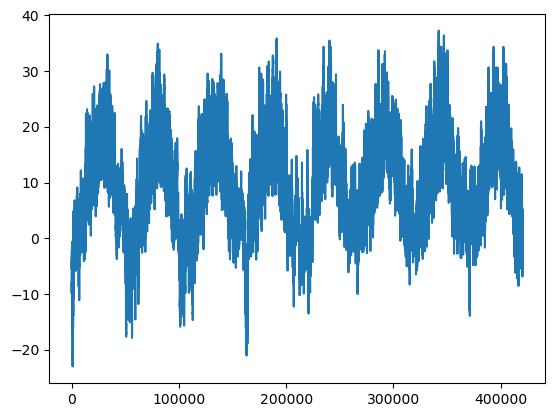

In [4]:
from matplotlib import pyplot as plt
plt.plot(range(len(temperature)), temperature)
plt.show()

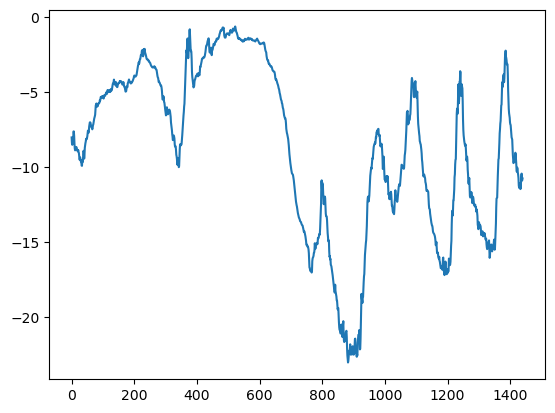

In [5]:
# 하루에 4시간씩 6번 기온이 저장되어 있다.
# 처음 10일 간 기온 그래프
plt.plot(range(1440), temperature[:1440])
plt.show()

In [8]:
num_train_samples = int(0.5 * len(raw_data)) # 학습
num_val_samples = int(0.25 * len(raw_data)) # 검증
num_test_samples = len(raw_data) - num_train_samples - num_val_samples # 테스트
# 개수 지정을 먼저 진행하였다.

print(num_train_samples, num_val_samples, num_test_samples)

210225 105112 105114


In [9]:
# 데이터 정규화
mean = raw_data[:num_train_samples].mean(axis=0)
raw_data -= mean
std = raw_data[:num_train_samples].std(axis=0)
raw_data /= std

In [10]:
from tensorflow import keras

int_sequence = np.arange(10) 
dummy_dataset = keras.utils.timeseries_dataset_from_array( # 시계열 데이터 생성
    data=int_sequence[:-3], # 데이터에서 0~6까지를 넣어준다.
    targets = int_sequence[3:], # 데이터에서 3~9까지 넣어준다.
    sequence_length = 3, # 시퀀스 길이 3
    batch_size=2, # 배치 사이즈 2
)

for inputs, targets in dummy_dataset:
    for i in range(inputs.shape[0]):
        print([int(x) for x in inputs[i]], int(targets[i]))

[0, 1, 2] 3
[1, 2, 3] 4
[2, 3, 4] 5
[3, 4, 5] 6
[4, 5, 6] 7


In [11]:
import keras

sampling_rate = 6
sequence_length = 120
delay = sampling_rate * (sequence_length + 24 - 1)
batch_size = 256

train_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=0,
    end_index=num_train_samples
)

val_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=num_train_samples,
    end_index=num_train_samples + num_val_samples
)

test_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=num_train_samples + num_val_samples
)

In [12]:
for samples, targets in train_dataset:
    print('샘플 크기 : ', samples.shape)
    print('타겟 크기 : ', targets.shape)
    break

샘플 크기 :  (256, 120, 14)
타겟 크기 :  (256,)


In [13]:
def evaluate_naive_method(dataset):
    total_abs_err=0.
    samples_seen=0
    for samples, targets in dataset:
        preds = samples[:, -1, 1] * std[i] + mean[1]
        total_abs_err += np.sum(np.abs(preds - targets))
        samples_seen += samples.shape[0]
    return total_abs_err / samples_seen

print(f'검증 MAE : {evaluate_naive_method(val_dataset):.2f}')
print(f'테스트 MAE : {evaluate_naive_method(test_dataset):.2f}')

검증 MAE : 2.42
테스트 MAE : 2.60


In [14]:
from tensorflow.keras import layers

inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.Flatten()(inputs)
x = layers.Dense(16, activation='relu')(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint('jena_dense.h5',
                                    save_best_only=True)
]

model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
history = model.fit(train_dataset, epochs=10, validation_data = val_dataset, callbacks=callbacks)

Epoch 1/10
819/819 [==============================] - 13s 16ms/step - loss: 12.1286 - mae: 2.7019 - val_loss: 10.4187 - val_mae: 2.5489
Epoch 2/10
  5/819 [..............................] - ETA: 12s - loss: 8.7236 - mae: 2.3483 

/Users/jeon-yewon/miniforge3/envs/tensorflow/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


819/819 [==============================] - 16s 20ms/step - loss: 8.9655 - mae: 2.3533 - val_loss: 10.6585 - val_mae: 2.5803
Epoch 3/10
819/819 [==============================] - 16s 20ms/step - loss: 8.2490 - mae: 2.2581 - val_loss: 10.9222 - val_mae: 2.6173
Epoch 4/10
819/819 [==============================] - 16s 20ms/step - loss: 7.7869 - mae: 2.1941 - val_loss: 11.2534 - val_mae: 2.6616
Epoch 5/10
819/819 [==============================] - 17s 20ms/step - loss: 7.4650 - mae: 2.1501 - val_loss: 10.9396 - val_mae: 2.6284
Epoch 6/10
819/819 [==============================] - 17s 21ms/step - loss: 7.1988 - mae: 2.1124 - val_loss: 11.2672 - val_mae: 2.6651
Epoch 7/10
819/819 [==============================] - 17s 20ms/step - loss: 6.9873 - mae: 2.0822 - val_loss: 11.7270 - val_mae: 2.7157
Epoch 8/10
819/819 [==============================] - 17s 21ms/step - loss: 6.8106 - mae: 2.0564 - val_loss: 11.1340 - val_mae: 2.6500
Epoch 9/10
819/819 [==============================] - 17s 20ms/ste

In [15]:
model = keras.models.load_model('jena_dense.h5')
print(f'테스트 MAE : {model.evaluate(test_dataset)[1]:.2f}')

405/405 [==============================] - 5s 13ms/step - loss: 11.0301 - mae: 2.6089
테스트 MAE : 2.61


## # 숙제 1 : Training, Validation mae 그래프 그리기

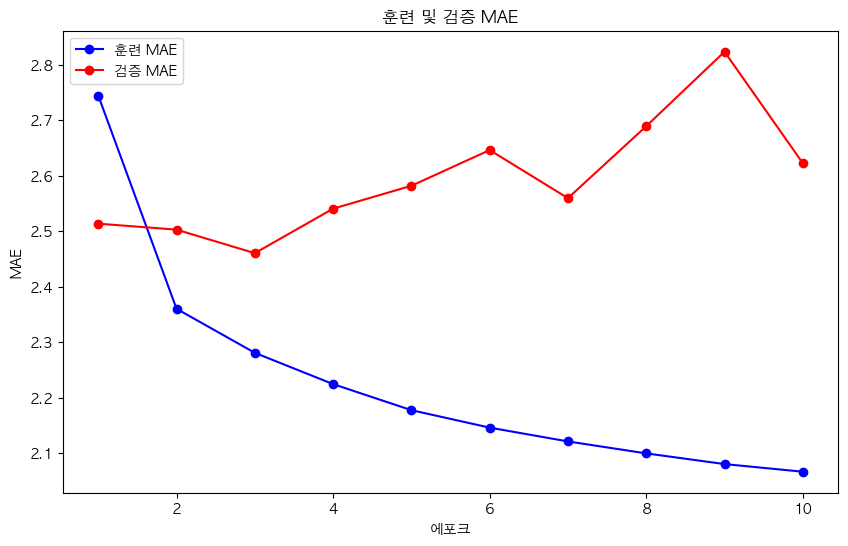

In [16]:
# 숙제 1 : Training, Validation mae 그래프 그리기
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.rc('font', family='AppleGothic')

train_mae = history.history['mae']
val_mae = history.history['val_mae']

epochs = range(1, len(train_mae) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_mae, 'bo-', label='훈련 MAE')
plt.plot(epochs, val_mae, 'ro-', label='검증 MAE')
plt.title('훈련 및 검증 MAE')
plt.xlabel('에포크')
plt.ylabel('MAE')
plt.legend()
plt.show()

## # 숙제 2 : 1D 합성곱 모델 시도해보기 Conv1D, MaxPooling1D, GlobalAveragePooling1D

In [17]:
# 숙제 2 : 1D 합성곱 모델 시도해보기 Conv1D, MaxPooling1D, GlobalAveragePooling1D
from tensorflow.keras import layers, models, callbacks
import matplotlib.pyplot as plt

In [18]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.Conv1D(32, 5, activation='relu')(inputs)
x = layers.MaxPooling1D(3)(x)
x = layers.Conv1D(32, 5, activation='relu')(x)
x = layers.MaxPooling1D(3)(x)
x = layers.Conv1D(32, 5, activation='relu')(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dense(16, activation='relu')(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

In [19]:
callbacks = [
    keras.callbacks.ModelCheckpoint('jena_conv1d.h5',
                                    save_best_only=True)
]

In [20]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [22]:
history = model.fit(train_dataset, epochs=10, validation_data=val_dataset, callbacks=callbacks)

Epoch 1/10
819/819 [==============================] - 25s 30ms/step - loss: 17.7440 - mae: 3.3234 - val_loss: 15.5649 - val_mae: 3.1552
Epoch 2/10
819/819 [==============================] - 26s 32ms/step - loss: 13.2825 - mae: 2.8698 - val_loss: 19.2847 - val_mae: 3.4448
Epoch 3/10
819/819 [==============================] - 26s 32ms/step - loss: 11.0108 - mae: 2.6111 - val_loss: 16.0176 - val_mae: 3.1341
Epoch 4/10
819/819 [==============================] - 26s 32ms/step - loss: 9.3852 - mae: 2.4100 - val_loss: 20.1820 - val_mae: 3.5569
Epoch 5/10
819/819 [==============================] - 27s 33ms/step - loss: 8.2729 - mae: 2.2600 - val_loss: 16.9482 - val_mae: 3.2253
Epoch 6/10
819/819 [==============================] - 27s 33ms/step - loss: 7.4712 - mae: 2.1462 - val_loss: 17.6316 - val_mae: 3.2732
Epoch 7/10
819/819 [==============================] - 28s 33ms/step - loss: 6.8509 - mae: 2.0590 - val_loss: 17.6739 - val_mae: 3.3026
Epoch 8/10
819/819 [==============================] 

In [23]:
model = keras.models.load_model('jena_conv1d.h5')

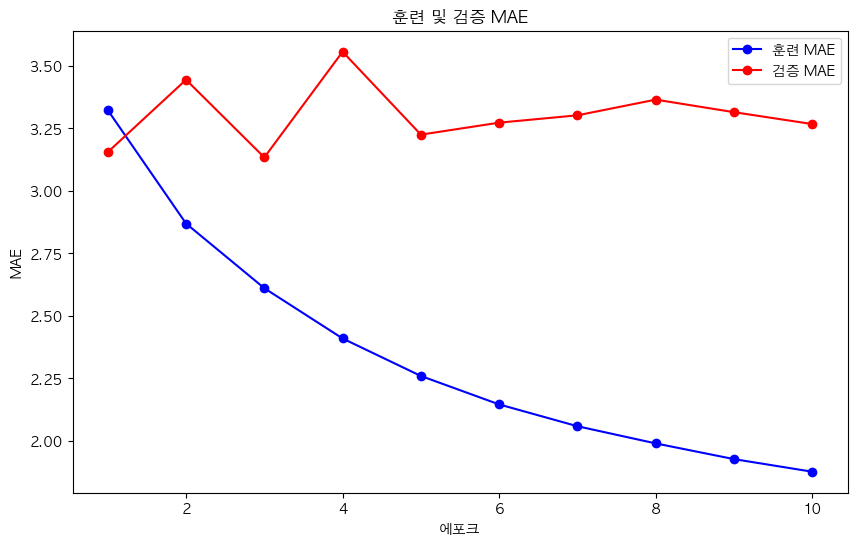

In [24]:
train_mae = history.history['mae']
val_mae = history.history['val_mae']
epochs = range(1, len(train_mae) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_mae, 'bo-', label='훈련 MAE')
plt.plot(epochs, val_mae, 'ro-', label='검증 MAE')
plt.title('훈련 및 검증 MAE')
plt.xlabel('에포크')
plt.ylabel('MAE')
plt.legend()
plt.show()

# 강사님 코드

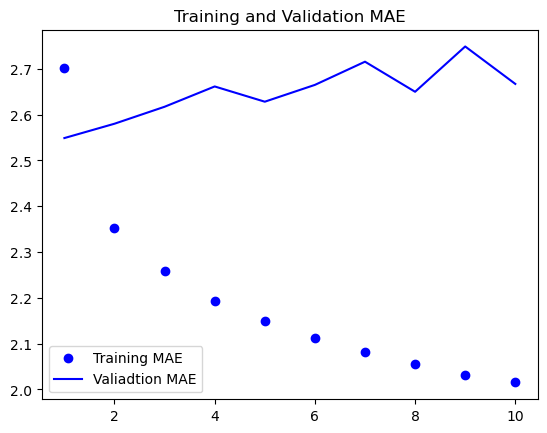

In [16]:
import matplotlib.pyplot as plt
loss = history.history['mae']
val_loss = history.history['val_mae']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'bo', label='Training MAE')
plt.plot(epochs, val_loss, 'b', label='Valiadtion MAE')
plt.title('Training and Validation MAE')
plt.legend()
plt.show()

## 숙제 2
- 필터 수 : 작은 값(8, 16, 32)에서 시작한다. 보통 네트워크 깊이가 깊어질수록 증가시키는 것이 일반적이다. 크기가 동일한 경우는 모델의 복잡성을 낮추기 위함이다.
- 필터 크기 : 데이터의 종류에 따라 조정될 수 있지만, 필터 크기를 서서히 줄여줌으로써 넓은 범위의 패턴에서 작은 범위의 패턴을 학습하게 하는 전략이다.
- 레이어 배치
    - Conv-Pool(합성곱과 풀링층의 패턴)(일반적으로 합성곱 레이어 뒤에 풀링 레이어를 배치한다.) 풀링 레이어가 데이터의 차원을 줄여 모델의 복잡성, 계산의 효율성을 높인다.
    - Golbal Pooling(일반적으로 마지막에 데이터를 압축하기 위해 하단에 사용된다.) Dense 층으로 연결하기 이전에 데이터의 크기를 고정한다.

In [17]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.Conv1D(8, 24, activation='relu')(inputs)
x = layers.MaxPooling1D(2)(x)
x = layers.Conv1D(8, 12, activation='relu')(x)
x = layers.MaxPooling1D(2)(x)
x = layers.Conv1D(16, 6, activation='relu')(x) # 필터 수 - 필터 크기
x = layers.GlobalAveragePooling1D()(x) # 압축
x = layers.Dense(16, activation='relu')(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

In [19]:
callbacks = [
    keras.callbacks.ModelCheckpoint('jena_conv.h5', save_best_only=True)
]

model.compile(optimizer = 'rmsprop', loss='mse', metrics=['mae'])
history = model.fit(train_dataset, epochs=10, validation_data = val_dataset, callbacks=callbacks)

Epoch 1/10
819/819 [==============================] - 31s 37ms/step - loss: 22.6168 - mae: 3.7087 - val_loss: 16.2190 - val_mae: 3.1420
Epoch 2/10
819/819 [==============================] - 30s 36ms/step - loss: 15.8298 - mae: 3.1568 - val_loss: 14.2715 - val_mae: 2.9637
Epoch 3/10
819/819 [==============================] - 30s 37ms/step - loss: 14.4192 - mae: 3.0088 - val_loss: 14.3928 - val_mae: 2.9815
Epoch 4/10
819/819 [==============================] - 29s 36ms/step - loss: 13.4535 - mae: 2.9028 - val_loss: 15.2598 - val_mae: 3.0943
Epoch 5/10
819/819 [==============================] - 29s 35ms/step - loss: 12.7220 - mae: 2.8165 - val_loss: 16.3176 - val_mae: 3.1727
Epoch 6/10
819/819 [==============================] - 29s 36ms/step - loss: 12.0632 - mae: 2.7369 - val_loss: 14.2516 - val_mae: 2.9815
Epoch 7/10
819/819 [==============================] - 31s 38ms/step - loss: 11.5807 - mae: 2.6799 - val_loss: 18.9491 - val_mae: 3.4551
Epoch 8/10
819/819 [============================

In [20]:
# 모델 결과 출력
model = keras.models.load_model('jena_conv.h5')
print(f'테스트 MAE : {model.evaluate(test_dataset)[1]:.2f}')

405/405 [==============================] - 8s 18ms/step - loss: 16.9134 - mae: 3.2038
테스트 MAE : 3.20


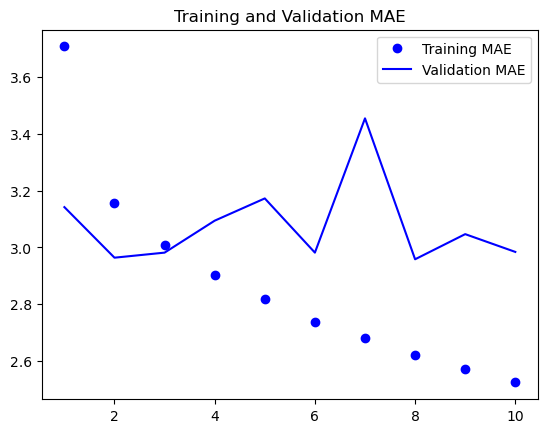

In [22]:
loss = history.history['mae']
val_loss = history.history['val_mae']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'bo', label='Training MAE')
plt.plot(epochs, val_loss, 'b', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.legend()
plt.show()

# 순환신경망 LSTM
: RNN의 기울기 소실 문제를 해결하기 위한 모델이다.

1. 셀 상태(Ct) : 시퀸스 전체에서 정보를 유지한다.
    - LSTM의 기억 부분(시간이 지나면 정보를 잊어버릴 수 있다.)(데이터 망각)
2. 입력 게이트(it)
    - it = σ(Wi * [ht-1, xt] + bi)
3. 망각 게이트(ft) : 셀 상태에서 어떤 정보를 잊을지 결정한다.

4. 출력 게이트(ot)

5. 새로운 셀 상태 : 망각게이트와 입력 게이트를 통해 업데이트가 된다.

6. 새로운 은닉 상태 : 셀 상태와 출력 게이트를 통해 계산된다.

## 흐름
1. 입력 게이트 계산 : 현재 입력 xt과 이전 은닉 상태 ht-1을 사용하여 입력게이트 it를 계산한다.
2. 망각 게이트 계산 : 현재 입력 xt과 이전 은닉 상태 ht-1을 사용하여 망각게이트 ft를 계산한다.
3. 셀 상태 업데이트 : 망각 게이트 ft를 사용하여 이전 셀 상태인 Ct-1의 일부를 잊어버린다. 입력 게이트 it와 새로운 셀 상태 Ct를 사용하여 새로운 정보를 추가한다.
4. 출력 게이트 계산 : 현재 입력 xt와 이전 은닉 상태 ht-1을 사용하여 출력게이트 ot를 계산한다.
5. 은닉 상태 계산 : 출력 게이트 ot와 위에서 업데이트 된 새로운 셀 상태 Ct를 사용하여 새로운 은닉 상태 ht를 계산한다.

In [23]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.LSTM(16)(inputs) # LSTM 레이어(기존에서 변경된 부분)(16개의 유닛을 가지고 있는)

outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint('jena_lstm.h5', save_best_only=True)
]

model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [24]:
history = model.fit(train_dataset, epochs=10, validation_data=val_dataset, callbacks=callbacks)

Epoch 1/10
819/819 [==============================] - 40s 48ms/step - loss: 43.3539 - mae: 4.8168 - val_loss: 13.0426 - val_mae: 2.7454
Epoch 2/10
819/819 [==============================] - 40s 49ms/step - loss: 11.2552 - mae: 2.5953 - val_loss: 9.5464 - val_mae: 2.4082
Epoch 3/10
819/819 [==============================] - 39s 48ms/step - loss: 9.8495 - mae: 2.4398 - val_loss: 9.5612 - val_mae: 2.3805
Epoch 4/10
819/819 [==============================] - 39s 48ms/step - loss: 9.3756 - mae: 2.3791 - val_loss: 10.0166 - val_mae: 2.4162
Epoch 5/10
819/819 [==============================] - 40s 48ms/step - loss: 8.9724 - mae: 2.3255 - val_loss: 9.7373 - val_mae: 2.4007
Epoch 6/10
819/819 [==============================] - 41s 49ms/step - loss: 8.7278 - mae: 2.2923 - val_loss: 10.3815 - val_mae: 2.4471
Epoch 7/10
819/819 [==============================] - 40s 49ms/step - loss: 8.5018 - mae: 2.2633 - val_loss: 9.7166 - val_mae: 2.4145
Epoch 8/10
819/819 [==============================] - 41s

In [25]:
model = keras.models.load_model('jena_lstm.h5')
print(f'테스트 MAE : {model.evaluate(test_dataset)[1]:.2f}')

405/405 [==============================] - 9s 22ms/step - loss: 11.1165 - mae: 2.5898
테스트 MAE : 2.59


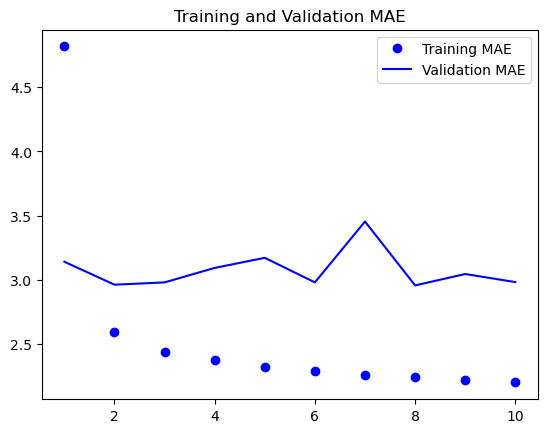

In [26]:
loss = history.history['mae']
loss_val = history.history['val_mae']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training MAE')
plt.plot(epochs, val_loss, 'b', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.legend()
plt.show()

In [27]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
# 학습속도를 위해 주석처리(밑 코드까지 첨부하면 너무 길어지기 때문에)(순환dropout)
# x = layers.LSTM(32, recurrent_dropout=0.25)(inputs)
# 순환 드롭아웃 : 과적합을 방지하기 위해 사용되는 정규화 기법(과도하게 의지하지 않도록)(기본적으로 RNN에서 사용된다.)
# 은닉 상태에 드롭아웃을 적용한다.
x = layers.LSTM(32)(inputs)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint('jena_lstm_dropout.h5', save_best_only=True)
]

model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

history = model.fit(train_dataset, epochs=20, validation_data = val_dataset, callbacks=callbacks)

Epoch 1/20
819/819 [==============================] - 63s 76ms/step - loss: 27.6374 - mae: 3.8676 - val_loss: 10.1771 - val_mae: 2.4648
Epoch 2/20
819/819 [==============================] - 61s 75ms/step - loss: 14.4314 - mae: 2.9411 - val_loss: 9.2910 - val_mae: 2.3609
Epoch 3/20
819/819 [==============================] - 63s 77ms/step - loss: 13.4437 - mae: 2.8360 - val_loss: 9.4152 - val_mae: 2.3688
Epoch 4/20
819/819 [==============================] - 63s 77ms/step - loss: 12.7571 - mae: 2.7640 - val_loss: 9.3784 - val_mae: 2.3739
Epoch 5/20
819/819 [==============================] - 62s 76ms/step - loss: 12.2363 - mae: 2.7081 - val_loss: 9.1038 - val_mae: 2.3388
Epoch 6/20
819/819 [==============================] - 63s 76ms/step - loss: 11.8183 - mae: 2.6619 - val_loss: 9.4699 - val_mae: 2.3913
Epoch 7/20
819/819 [==============================] - 64s 78ms/step - loss: 11.3935 - mae: 2.6130 - val_loss: 10.4473 - val_mae: 2.5195
Epoch 8/20
819/819 [==============================] -

# 스태킹 순환층(Stacked Recurrent Layers)
: 여러 순환층(RNN, LSTM, GRU)을 층별로 쌓아올린 것을 말한다.

## * GRU(Gated Recurrent Unit)
: 장기 의존성을 학습할 수 있도록 설계된 모델이다.

#### 1) 업데이트 게이트(Update gate)
: 이전 상태를 얼마나 유지할지 결정한다.
#### 2) 리셋 게이트(Reset gate)
: 이전 상태를 얼마나 무시할지 결정한다.
#### 3) 새로운 상태 생성(New State Creation) 
: 현재 입력과 이전 상태를 결합해서 새로운 상태를 생성한다.

In [30]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
# x = layers.GRU(32, recurrent_dropout=0.5, return_sequence=True)(inputs)
# x = layers.GRU(32, recurrent_dropout=0.5)(x)
# return_sequence=True : GRU 레이어가 각 시간 단계의 출력을 모두 반환한다.
# return_sequence=False : GRU의 마지막 시간의 출력을 반환한다.(default value)
x = layers.GRU(32, return_sequences=True)(inputs) 
x = layers.GRU(32)(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint('jena_stacked_gru_dropout.h5', save_best_only=True)
]

model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [32]:
history = model.fit(train_dataset, epochs=10, validation_data = val_dataset, callbacks=callbacks)

Epoch 1/10
819/819 [==============================] - 111s 134ms/step - loss: 23.8011 - mae: 3.5996 - val_loss: 9.1822 - val_mae: 2.3532
Epoch 2/10
819/819 [==============================] - 110s 135ms/step - loss: 13.6652 - mae: 2.8558 - val_loss: 8.7172 - val_mae: 2.2858
Epoch 3/10
819/819 [==============================] - 111s 135ms/step - loss: 12.6479 - mae: 2.7553 - val_loss: 9.7866 - val_mae: 2.4208
Epoch 4/10
819/819 [==============================] - 114s 139ms/step - loss: 11.8191 - mae: 2.6633 - val_loss: 9.1591 - val_mae: 2.3543
Epoch 5/10
819/819 [==============================] - 110s 135ms/step - loss: 11.1008 - mae: 2.5853 - val_loss: 9.4023 - val_mae: 2.3905
Epoch 6/10
819/819 [==============================] - 112s 137ms/step - loss: 10.3973 - mae: 2.5012 - val_loss: 9.5991 - val_mae: 2.4225
Epoch 7/10
819/819 [==============================] - 110s 134ms/step - loss: 9.7064 - mae: 2.4155 - val_loss: 9.9770 - val_mae: 2.4742
Epoch 8/10
819/819 [======================

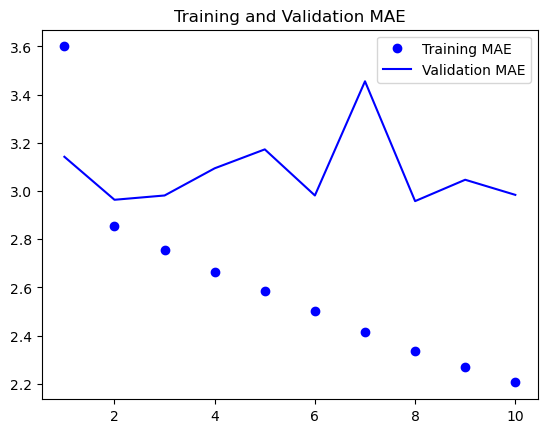

In [33]:
loss = history.history['mae']
loss_val = history.history['val_mae']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training MAE')
plt.plot(epochs, val_loss, 'b', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.legend()
plt.show()

# 양방향 LSTM 모델

In [34]:
# 시퀸스를 거꾸로 뒤집어 LSTM 모델 훈련하기
# LSTM은 긴 시퀀스 내에서 정보의 흐름을 유지할 수 있지만 시작 부분이 마지막 부분에 영향을 미치지 않을 수 있다.
# 시퀀스를 거꾸로 뒤집어 훈련함으로써 원래 시퀀스의 마지막 부분이 네트워크의 첫 부분에서 처리될 수 있게 만든다.
def train_generator():
    while True:
        for samples.targets in train_dataset:
            yield samples[:, ::-1, :], targets

def val_generator():
    while True:
        for samples, targets in val_dataset:
            yield samples[:, ::-1, :], targets

train_gen = train_generator()
val_gen = val_generator()

In [39]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.LSTM(32)(inputs)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# steps_epoch을 steps_per_epoch으로 수정
history = model.fit(train_gen, epochs=10, steps_per_epoch=819, validation_data=val_gen, validation_steps=410)

Epoch 1/10
819/819 [==============================] - 71s 85ms/step - loss: 27.6966 - mae: 3.8849 - val_loss: 24.1758 - val_mae: 3.8269
Epoch 2/10
819/819 [==============================] - 72s 88ms/step - loss: 10.2861 - mae: 2.3493 - val_loss: 24.8956 - val_mae: 3.8719
Epoch 3/10
819/819 [==============================] - 69s 84ms/step - loss: 8.4023 - mae: 2.1084 - val_loss: 26.1789 - val_mae: 3.9824
Epoch 4/10
819/819 [==============================] - 73s 89ms/step - loss: 6.9520 - mae: 1.9155 - val_loss: 27.6577 - val_mae: 4.0887
Epoch 5/10
819/819 [==============================] - 72s 88ms/step - loss: 5.9967 - mae: 1.7858 - val_loss: 29.2764 - val_mae: 4.2038
Epoch 6/10
819/819 [==============================] - 72s 88ms/step - loss: 5.3634 - mae: 1.6832 - val_loss: 29.9564 - val_mae: 4.2643
Epoch 7/10
819/819 [==============================] - 79s 96ms/step - loss: 5.0832 - mae: 1.6259 - val_loss: 30.5664 - val_mae: 4.2843
Epoch 8/10
819/819 [==============================] -

### 양방향 RNN(Bidirextional RNN0
: 시퀸스를 두 방향으로 처리한다.

- 양방향 RNN은 시퀸스 양쪽 끝에서 정보를 얻을 수 있으므로 단방향 RNN보다 많은 문맥 정보를 얻을 수 있다.
- 두 개의 상태 벡터를 사용하여 정방향, 역방향 처리 결과를 결합하여 출력을 만든다.

In [41]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.Bidirectional(layers.LSTM(16))(inputs)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

history = model.fit(train_dataset, epochs=10, validation_data=val_dataset)

Epoch 1/10
819/819 [==============================] - 71s 85ms/step - loss: 29.7551 - mae: 3.8876 - val_loss: 10.6531 - val_mae: 2.5271
Epoch 2/10
819/819 [==============================] - 66s 80ms/step - loss: 9.3680 - mae: 2.3889 - val_loss: 10.1624 - val_mae: 2.4616
Epoch 3/10
819/819 [==============================] - 65s 80ms/step - loss: 8.3624 - mae: 2.2556 - val_loss: 10.0873 - val_mae: 2.4449
Epoch 4/10
819/819 [==============================] - 70s 86ms/step - loss: 7.7556 - mae: 2.1758 - val_loss: 10.3171 - val_mae: 2.4836
Epoch 5/10
819/819 [==============================] - 73s 90ms/step - loss: 7.2840 - mae: 2.1106 - val_loss: 10.8303 - val_mae: 2.5587
Epoch 6/10
819/819 [==============================] - 69s 84ms/step - loss: 6.9035 - mae: 2.0534 - val_loss: 10.9015 - val_mae: 2.5588
Epoch 7/10
819/819 [==============================] - 71s 86ms/step - loss: 6.6349 - mae: 2.0097 - val_loss: 10.8974 - val_mae: 2.5614
Epoch 8/10
819/819 [==============================] - 